In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing import text
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv(r'feature_extracted_data/train.csv')
df1 = pd.read_csv(r'feature_extracted_data/test.csv')

In [3]:
df

,URL,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Non-standard_Doubleslash,https_Domain,Shortened_URL,Hyphen_Count,DNS_Record,Comb_5y_interest,Domain_Age,Domain_Active,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,http://superuser.com/questions/694540/windows-...,superuser.com,0,0,97,3,0,0,0,0,1,2041,9940,1,0,0,0,1,0
1,http://bdnews24.com/bangladesh/2015/05/14/bdne...,bdnews24.com,0,0,113,5,0,0,0,0,1,11617,6717,1,1,0,0,1,0
2,https://codepen.io/anon/embed/QbNqgv?height=30...,codepen.io,0,0,112,3,0,1,0,0,1,9155,3979,1,0,0,0,0,0
3,http://kakaku.com/pc/note-pc-battery/ranking_0...,kakaku.com,0,0,84,6,0,0,0,0,1,8778,8960,1,1,0,0,2,0
4,http://kienthuc.net.vn/hoi-dap-ve-tuyen-sinh/c...,kienthuc.net.vn,0,0,111,2,0,0,0,0,1,3218,0,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://my-metamessk.com/imports/,my-metamessk.com,0,0,33,1,0,1,0,1,1,0,14,1,2,2,2,-1,1
9996,https://dwvjqx.webwave.dev/?inf_contact_key=c3...,dwvjqx.webwave.dev,0,0,76,0,0,1,0,0,1,0,1427,1,0,0,0,0,1
9997,https://verify-i-cloud.mipaginaweb.us/expire/,verify-i-cloud.mipaginaweb.us,0,0,45,1,0,1,0,2,1,0,156,1,0,0,0,0,1
9998,https://objectstorage.ap-tokyo-1.oraclecloud.c...,objectstorage.ap-tokyo-1.oraclecloud.com,0,0,96,6,0,1,0,2,1,0,5082,1,0,0,1,0,1


In [4]:
tokens = text.Tokenizer()
tokens1 = text.Tokenizer()
tokens.fit_on_texts(df['URL'])
tokens1.fit_on_texts(df['Domain'])

df['URL'] = tokens.texts_to_matrix(df['URL'])
df['Domain'] = tokens.texts_to_matrix(df['Domain'])
df1['URL'] = tokens.texts_to_matrix(df1['URL'])
df1['Domain'] = tokens.texts_to_matrix(df1['Domain'])

In [5]:
x_train = df.iloc[:,0:18]
y_train = df.iloc[:,18]
x_test = df1.iloc[:,0:18]
y_test = df1.iloc[:,18]

In [6]:
bnb = BernoulliNB(alpha=0.0, force_alpha=False, binarize=80, fit_prior=True, class_prior=None)

In [7]:
bnb.fit(x_train, y_train)

C:\Supervised Learning\Phishing_web_det\phish_det\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


BernoulliNB(alpha=0.0, binarize=80, force_alpha=False)

In [8]:
y_pred = bnb.predict(x_test)

In [9]:
%%timeit
warnings.filterwarnings('ignore')
bnb.fit(x_train, y_train)

5.41 ms ± 996 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
y_pred = bnb.predict(x_test)

1.44 ms ± 85.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
metrics.accuracy_score(y_test, y_pred)

0.9756666666666667

In [12]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [13]:
matrix = metrics.confusion_matrix(y_test, y_pred)

<AxesSubplot: >

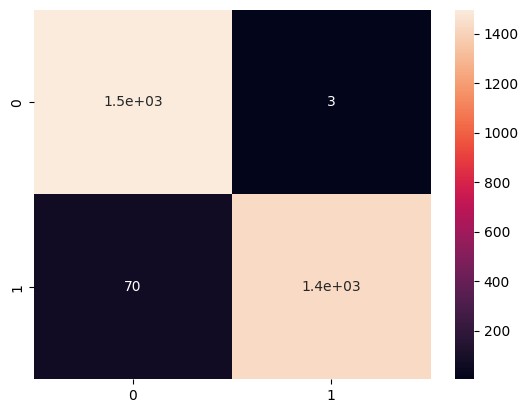

In [14]:
sns.heatmap(matrix, annot=True)

In [15]:
precision, recall

(0.9766175716796757, 0.9756666666666667)